In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

In [76]:
# X = np.linspace(0, 100, 250)[:,np.newaxis]
X = np.linspace(0, 100, 250)[np.newaxis,:]
Y = np.sin(X)
print(X.shape)

(1, 250)


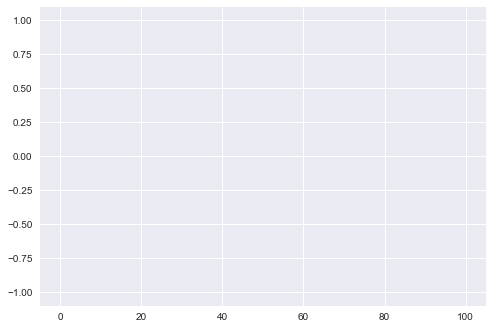

In [77]:
plt.plot(X, Y)
plt.show()

In [5]:
tf.reset_default_graph()
config = tf.ConfigProto()
session = tf.Session(config=config)

In [73]:
def lstm_model(X, **kwargs):
    N, D = X[0].shape
    x = tf.placeholder(tf.float32, shape=X.shape)
    wx = tf.Variable(tf.random_normal([D, 4 * kwargs['H']], stddev=kwargs['stddev']))
    wh = tf.Variable(tf.random_normal([kwargs['H'], 4 * kwargs['H']], stddev=kwargs['stddev']))
    b = tf.Variable(tf.zeros([4 * kwargs['H']]))
    prev_c = tf.Variable(tf.random_normal([N, kwargs['H']], stddev=kwargs['stddev']))
    prev_h = tf.Variable(tf.random_normal([N , kwargs['H']], stddev=kwargs['stddev']))
    
    lstm_step(x=x, prev_h=prev_h, prev_c=prev_c, wx=wx, wh=wh, b=b)
    

def lstm_step(**kwargs):
    x, prev_h, prev_c, wx, wh, b = kwargs['x'], kwargs['prev_h'], kwargs['prev_c'], kwargs['wx'], kwargs['wh'], kwargs['b'] 
    a = tf.matmul(x, wx) + tf.matmul(prev_h, wh) + b
    ai, af, ao, ag = tf.split(a, 4, axis=1)
    i_g, f_g, o_g, g_g = tf.sigmoid(ai), tf.sigmoid(af), tf.sigmoid(ao), tf.tanh(ag)
    next_c = f_g * prev_c + i_g * g_g
    next_h = o_g * tf.tanh(next_c)
    return next_h

In [78]:
o = lstm_model(X, H=100, stddev=0.5)

AttributeError: 'NoneType' object has no attribute 'shape'